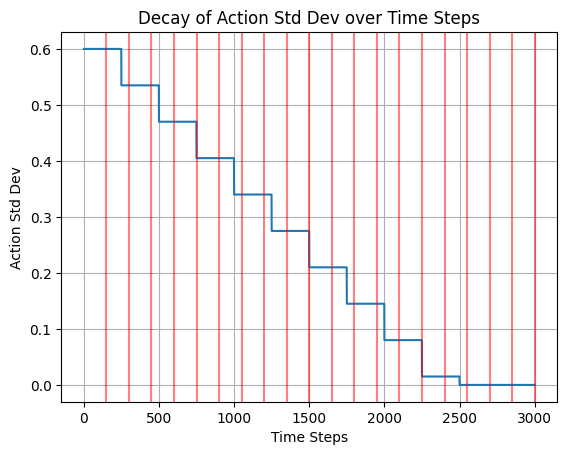

In [10]:
import matplotlib.pyplot as plt

update_timestep = 150
initial_action_std = 0.6
action_std_decay_rate = 0.065
min_action_std = 1e-7
action_std_decay_freq = 250 # Frequency of decay

episodes = 50
time_steps = 60
all_steps = time_steps * episodes

current_action_std = initial_action_std
std_devs = [current_action_std]

for time_step in range(1, all_steps + 1):
    if time_step % action_std_decay_freq == 0:
        current_action_std -= action_std_decay_rate
        current_action_std = round(current_action_std, 4)
        if current_action_std < min_action_std:
            current_action_std = min_action_std
    std_devs.append(current_action_std)

plt.plot(range(all_steps + 1), std_devs)
plt.xlabel('Time Steps')
plt.ylabel('Action Std Dev')
plt.title('Decay of Action Std Dev over Time Steps')

for step in range(update_timestep, all_steps + 1, update_timestep):
    plt.axvline(x=step, color='r', linestyle='-', alpha=0.5)

plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

sub_folder = 'model_metric_data/ppo'
# sub_folder = '../trained/continous'

model_folder = f'{sub_folder}/300ep1000resources50rps1000interval0.75alpha50scale_a0.5gl'
ep_summed_rewards_df = pd.read_csv(f'{model_folder}/ep_summed_rewards.csv')
ep_latencies_df = pd.read_csv(f'{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'{model_folder}/resource_dev.csv')

num_agents = 3
agent_ep_summed_rewards = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_ep_summed_rewards.append(agent_rewards_df)

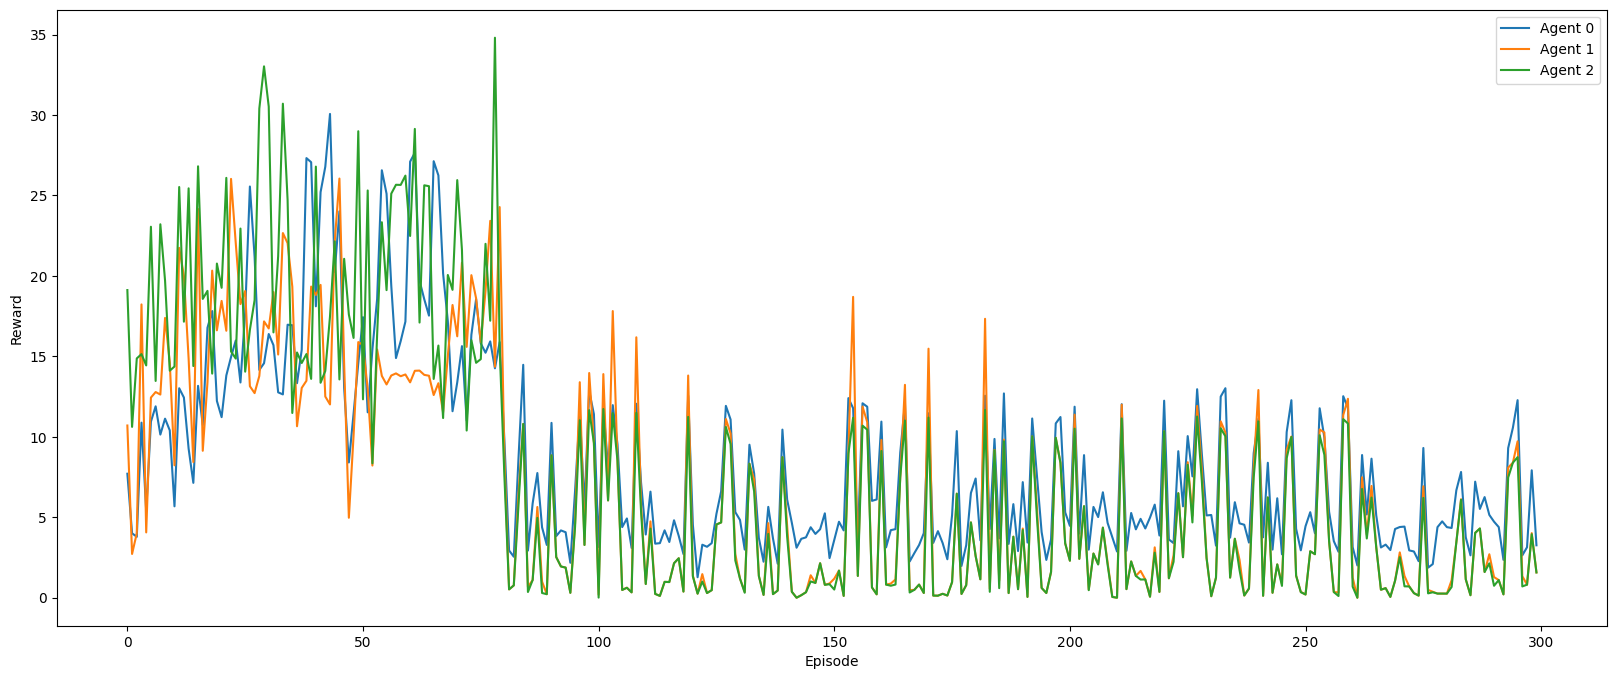

In [2]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_ep_summed_rewards)):
    ax.plot(agent_ep_summed_rewards[i]['Episode'], agent_ep_summed_rewards[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


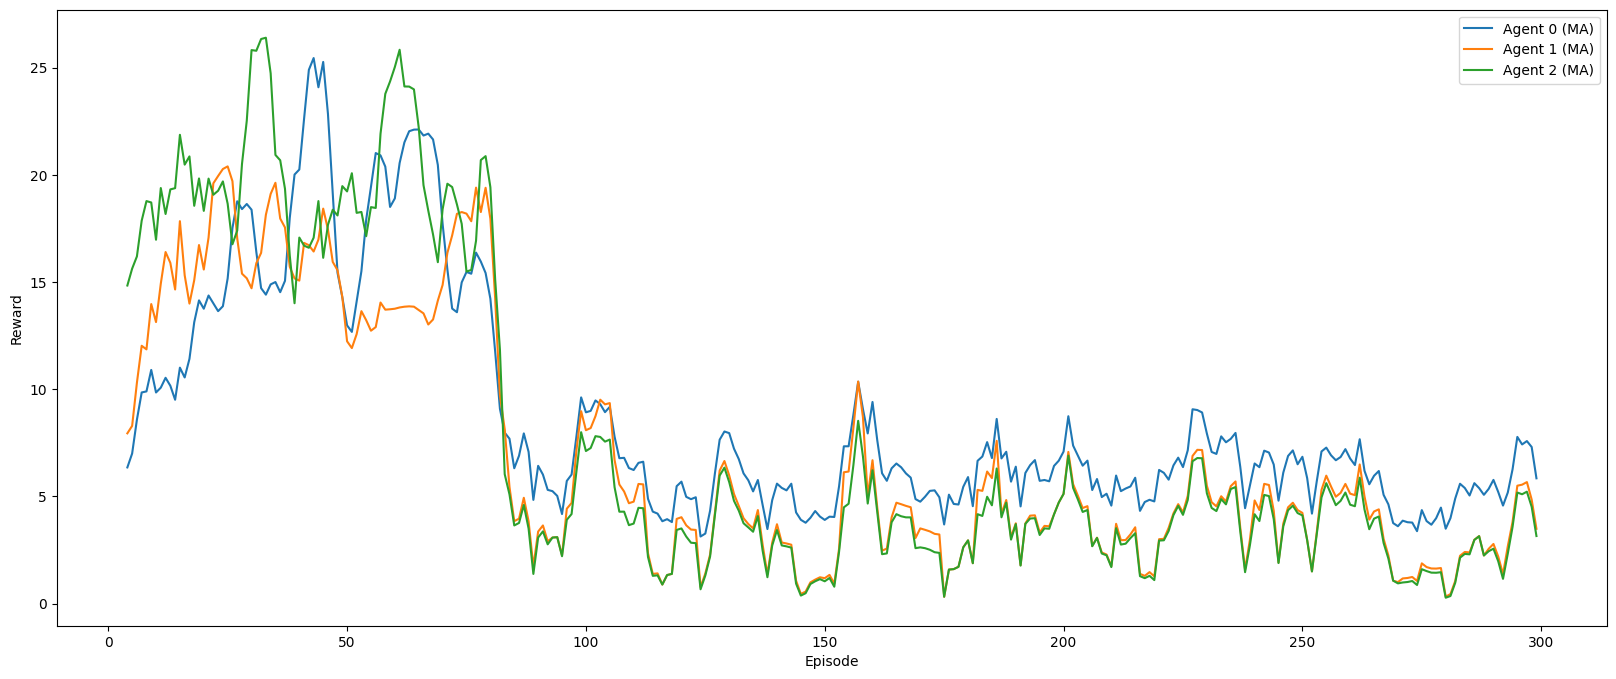

In [3]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 5

for i in range(len(agent_ep_summed_rewards)):
    rewards_smoothed = moving_average(agent_ep_summed_rewards[i]['Reward'], window_size)
    episodes_adjusted = agent_ep_summed_rewards[i]['Episode'][window_size-1:]
    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')

ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

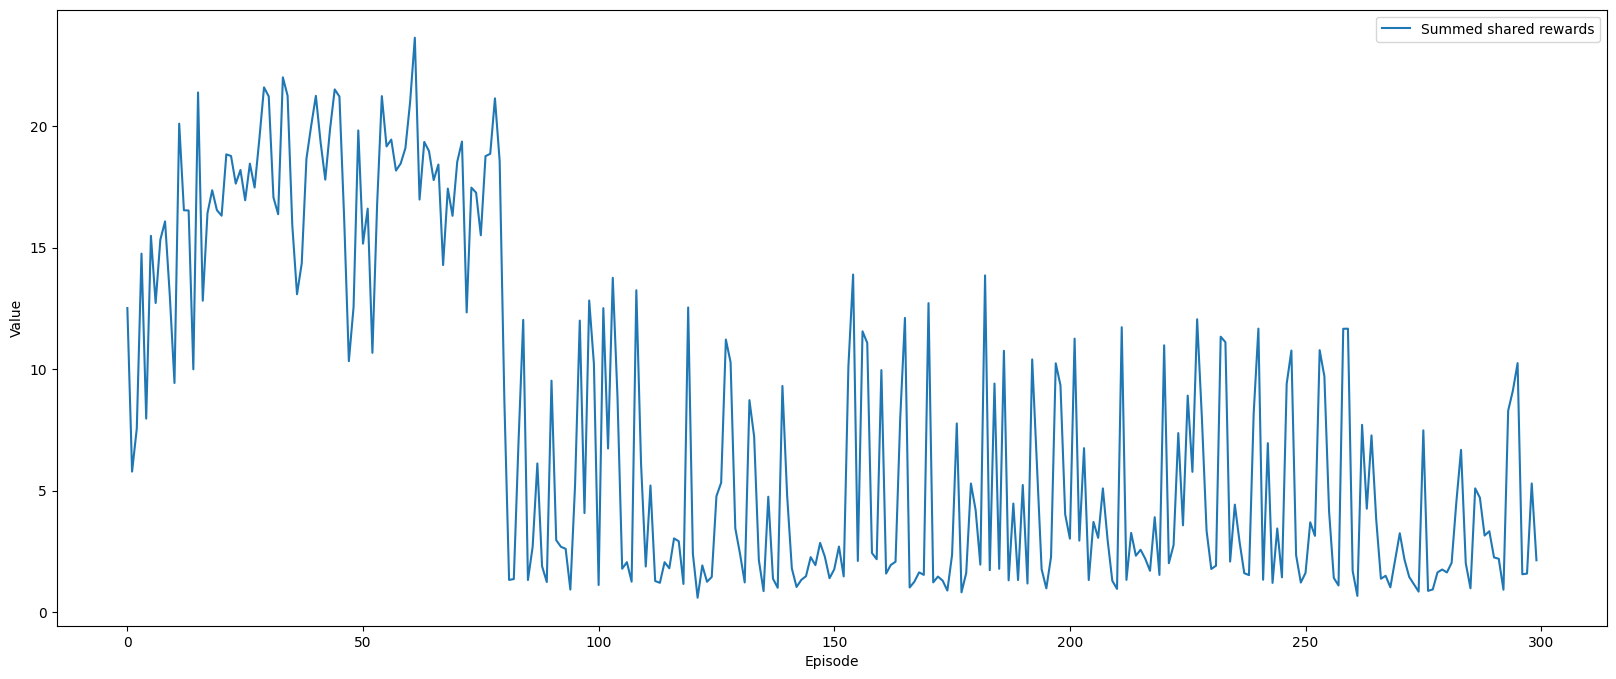

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_summed_rewards_df['Reward'], label='Summed shared rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()


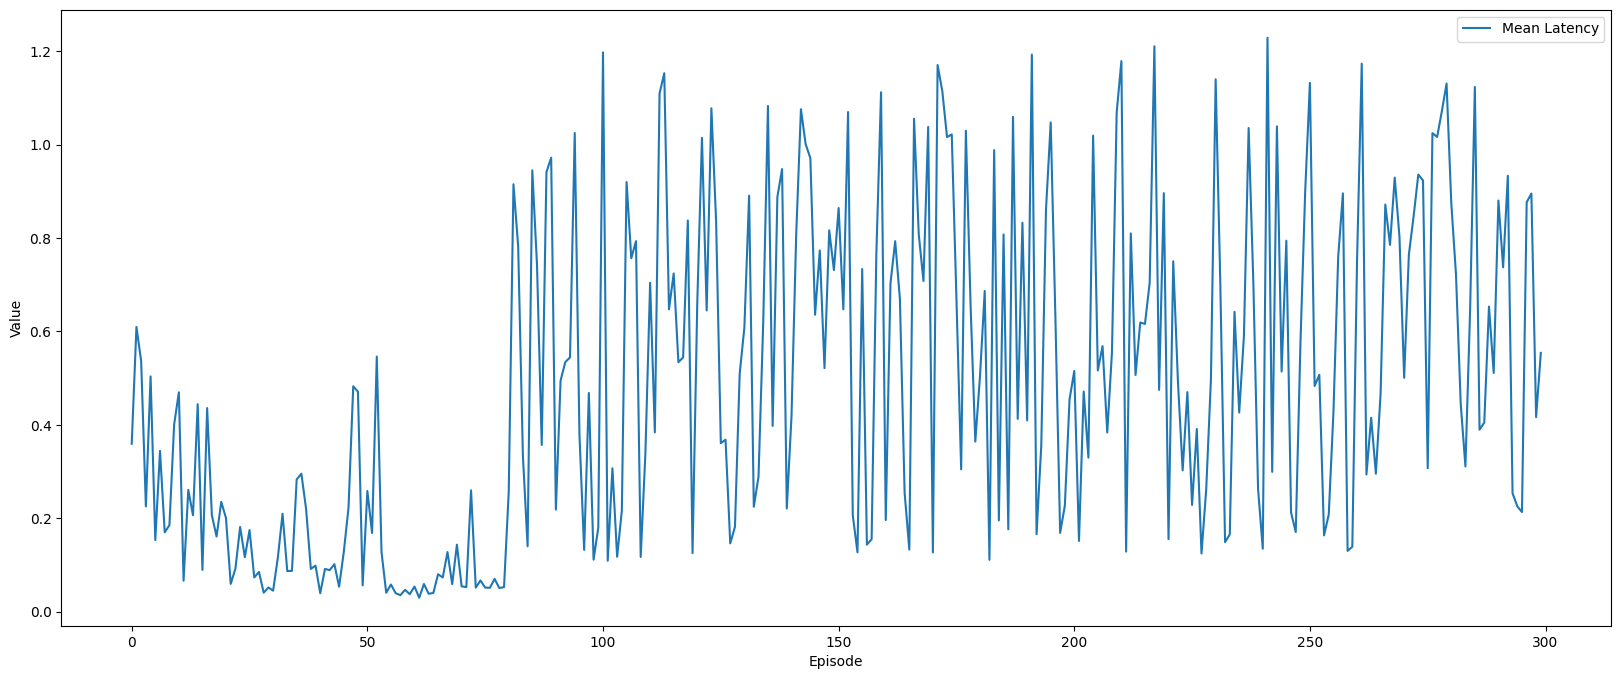

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
# ep_latencies_df_smoothed = moving_average(ep_latencies_df['Mean Latency'], window_size)
# plt.plot(ep_latencies_df_smoothed, label='Mean Latency (MA)')
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Latency')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()